## Comparing DLC Camera CSV 3D coordinate Data to Autobender/Rotary Encoder

In [377]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [378]:
from config import path_to_repository
from analysis import DLC3DBendAngles
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [622]:
#load rotary encoder csv, camera 3d data form DLC csv, and flir_data.mat with timestamps from python camera acquisition
trial_string = "35_22" # choose from 24_57, 29_07, 31_23, 33_22, 35_22, 37_05
# REMEMBER to change valley and peak ranges/inte-peak distance below based on trial

signed_angles = False # whether to compute signed angles (True) or unsigned angles (False)

renc = os.path.join(path_to_repository , f'/Volumes/ExtremeSSD/SNEL/camera_data/experimental_data_2025_08_20_20_06_02/sensor_data/2025_08_20_18_{trial_string}/data_rotenc_2025_08_20_18_{trial_string}.csv')
df_renc = pd.read_csv(renc)  
# cam = os.path.join(path_to_repository , '/Volumes/ExtremeSSD/SNEL/camera_data/8.22 calib/videos_and_analyzed_3D/2025_08_20_18_24_57_DLC_3D.csv')
cam = os.path.join(path_to_repository , f'/Volumes/ExtremeSSD/SNEL/camera_data/8.22 calib/videos_and_analyzed_3D/MATLAB Triangulation/MATLAB_triangulation_working/new_converted_triangulated_3D_points_{trial_string}.csv')
cam_timestamp = os.path.join(
    path_to_repository,
    f'/Volumes/ExtremeSSD/SNEL/camera_data/trials 8.20/2025_08_20_18_{trial_string}/flir_data.mat'
)

temp_save_dir = os.path.join(path_to_repository , '/Users/phily/Developer/sensorimotor-lab/Strain-Sensor-/Code/analysis/temp_plots')
if not os.path.exists(temp_save_dir):
    os.makedirs(temp_save_dir)
    


In [623]:
#load DLC 3d coordinates from DLC triangulation
cam = DLC3DBendAngles(cam)

# Load only variables starting with 'ts' -> timestamp data
df_ts = cam.load_mat_as_df(cam_timestamp, prefix="ts")

In [624]:
#check number of rows from  cam dataframe (taken from DLC csv) and df_ts dataframe (timestamps form flir_data.mat file).  They hopefully are the same.  If not, need to determine which frames dropped.
rows_renc, rows_cam = DLC3DBendAngles.compare_row_counts(cam.df, df_ts)

DataFrame 1: 199 rows
DataFrame 2: 199 rows


In [625]:
#add camera timestamp columns to 3d dlc data
cam.add_dataframe(df_ts)

scorer     DLC_3D                                               \
    bodyparts        PIP                               MCP              
       coords          x          y           z          x          y   
0           0 -56.407691 -34.783209  210.792842 -12.783567 -23.532353   
1           1 -56.414005 -34.730264  210.841373 -12.787210 -23.480132   
2           2 -56.407139 -34.749427  210.827146 -12.778167 -23.508914   
3           3 -56.417401 -34.764705  210.803167 -12.780235 -23.518726   
4           4 -56.420838 -34.739852  210.846687 -12.792092 -23.495242   
..        ...        ...        ...         ...        ...        ...   
194       194 -57.688983 -33.832180  213.429266 -13.096075 -23.803433   
195       195 -57.683807 -33.915282  213.295997 -13.097883 -24.013617   
196       196 -57.696984 -33.824015  213.390979 -13.118057 -23.801716   
197       197 -57.688530 -33.864622  213.303260 -13.104145 -23.960993   
198       198 -57.686098 -33.841245  213.305204 -13.134742 -23.828343   

                                                                         \
                     hand                        radius_styloid_process   
              z         x          y           z                      x   
0    222.864746  0.482059 -18.330772  227.252709              51.018960   
1    222.933579  0.457356 -18.306809  227.252600              51.013317   
2    222.911970  0.463506 -18.317178  227.247799              51.019540   
3    222.895213  0.461807 -18.329779  227.243019              51.008546   
4    222.939478  0.462131 -18.302194  227.275021              51.007086   
..          ...       ...        ...         ...                    ...   
194  222.832183  0.248847 -18.531406  227.653145              50.720510   
195  222.577163  0.243420 -18.606527  227.549559              50.690671   
196  222.791898  0.231209 -18.520814  227.619776              50.695932   
197  222.627740  0.232319 -18.537674  227.542694              50.706893   
198  222.733799  0.210819 -18.527120  227.476277              50.674116   

                                                             ts_25183199  \
                             forearm                                       
            y           z          x         y           z                 
0   -7.545478  224.668002  88.473726  4.020301  231.659335  183527321897   
1   -7.518829  224.689195  88.456164  4.038755  231.668930  183527375965   
2   -7.540466  224.697065  88.463910  4.014001  231.683601  183527426484   
3   -7.545880  224.670599  88.456572  4.000458  231.651525  183527476955   
4   -7.539590  224.702042  88.460727  4.022664  231.705221  183527527521   
..        ...         ...        ...       ...         ...           ...   
194 -7.811240  224.737248  88.246828  3.824235  231.813644  183537105992   
195 -7.867882  224.646201  88.188343  3.701455  231.664850  183537156365   
196 -7.814947  224.697734  88.171341  3.812363  231.662449  183537206878   
197 -7.814428  224.650631  88.177592  3.825209  231.631455  183537259597   
198 -7.817466  224.602676  88.152600  3.822060  231.631089  183537313547   

      ts_25185174  
                   
                   
0    183527342244  
1    183527383641  
2    183527433508  
3    183527483944  
4    183527536342  
..            ...  
194  183537113430  
195  183537164034  
196  183537216483  
197  183537267528  
198  183537321426  

[199 rows x 18 columns]

## Bend Angle obtained from Dot Product Formula

## $\theta = \cos^{-1} \left( \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{\|\mathbf{v}_1\| \, \|\mathbf{v}_2\|} \right)$

As an example:  

V1 is vector from hand to MCP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)

V2 is vector from MCP to PIP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)


In [626]:
#Calculte bend angles from DLC 3d trianglulated data

# --- MCP bend ---
hand_pts = cam.get_points("hand")
mcp_pts  = cam.get_points("MCP")
pip_pts  = cam.get_points("PIP")

v1_mcp = cam.vector(hand_pts, mcp_pts)  # hand→MCP
v2_mcp = cam.vector(mcp_pts, pip_pts)   # MCP→PIP
ref = np.array([0,0,1])
angles_mcp = cam.angle_from_vectors(v1_mcp, v2_mcp, signed_angles, ref)

# --- Wrist angle ---
forearm_pts = cam.get_points("forearm")
hand_pts = cam.get_points("hand")
mcp_pts = cam.get_points("MCP")

v1_wrist = cam.vector(forearm_pts, hand_pts)  # forearm→hand
v2_wrist = cam.vector(hand_pts, mcp_pts)      # hand→MCP
angles_wrist = cam.angle_from_vectors(v1_wrist, v2_wrist)

# --- Add both angles to a copy of the DataFrame ---
df_out = cam.df.copy()
df_out[("metric", "mcp_bend_deg", "deg")]   = angles_mcp
df_out[("metric", "wrist_bend_deg", "deg")] = angles_wrist

cam.add_dataframe(df_out)



scorer     DLC_3D                                               \
    bodyparts        PIP                               MCP              
       coords          x          y           z          x          y   
0           0 -56.407691 -34.783209  210.792842 -12.783567 -23.532353   
1           1 -56.414005 -34.730264  210.841373 -12.787210 -23.480132   
2           2 -56.407139 -34.749427  210.827146 -12.778167 -23.508914   
3           3 -56.417401 -34.764705  210.803167 -12.780235 -23.518726   
4           4 -56.420838 -34.739852  210.846687 -12.792092 -23.495242   
..        ...        ...        ...         ...        ...        ...   
194       194 -57.688983 -33.832180  213.429266 -13.096075 -23.803433   
195       195 -57.683807 -33.915282  213.295997 -13.097883 -24.013617   
196       196 -57.696984 -33.824015  213.390979 -13.118057 -23.801716   
197       197 -57.688530 -33.864622  213.303260 -13.104145 -23.960993   
198       198 -57.686098 -33.841245  213.305204 -13.134742 -23.828343   

                                                                         \
                     hand                        radius_styloid_process   
              z         x          y           z                      x   
0    222.864746  0.482059 -18.330772  227.252709              51.018960   
1    222.933579  0.457356 -18.306809  227.252600              51.013317   
2    222.911970  0.463506 -18.317178  227.247799              51.019540   
3    222.895213  0.461807 -18.329779  227.243019              51.008546   
4    222.939478  0.462131 -18.302194  227.275021              51.007086   
..          ...       ...        ...         ...                    ...   
194  222.832183  0.248847 -18.531406  227.653145              50.720510   
195  222.577163  0.243420 -18.606527  227.549559              50.690671   
196  222.791898  0.231209 -18.520814  227.619776              50.695932   
197  222.627740  0.232319 -18.537674  227.542694              50.706893   
198  222.733799  0.210819 -18.527120  227.476277              50.674116   

                                                             ts_25183199  \
                             forearm                                       
            y           z          x         y           z                 
0   -7.545478  224.668002  88.473726  4.020301  231.659335  183527321897   
1   -7.518829  224.689195  88.456164  4.038755  231.668930  183527375965   
2   -7.540466  224.697065  88.463910  4.014001  231.683601  183527426484   
3   -7.545880  224.670599  88.456572  4.000458  231.651525  183527476955   
4   -7.539590  224.702042  88.460727  4.022664  231.705221  183527527521   
..        ...         ...        ...       ...         ...           ...   
194 -7.811240  224.737248  88.246828  3.824235  231.813644  183537105992   
195 -7.867882  224.646201  88.188343  3.701455  231.664850  183537156365   
196 -7.814947  224.697734  88.171341  3.812363  231.662449  183537206878   
197 -7.814428  224.650631  88.177592  3.825209  231.631455  183537259597   
198 -7.817466  224.602676  88.152600  3.822060  231.631089  183537313547   

      ts_25185174       metric                 
                  mcp_bend_deg wrist_bend_deg  
                           deg            deg  
0    183527342244     7.004197      15.968184  
1    183527383641     6.870009      15.736067  
2    183527433508     6.966767      15.812072  
3    183527483944     6.963025      15.862380  
4    183527536342     6.943030      15.797724  
..            ...          ...            ...  
194  183537113430    11.030921      17.478458  
195  183537164034    11.909733      18.153850  
196  183537216483    11.062811      17.571902  
197  183537267528    11.798537      17.997886  
198  183537321426    10.914576      17.254898  

[199 rows x 20 columns]

In [627]:
# Count how many NAN's in MCP Bend Angle ->  max should be size of number of timestamps from camera data 

col_name = ("metric", "mcp_bend_deg", "deg")  # tuple key in MultiIndex

# Count NaNs
num_nans = cam.df[col_name].isna().sum()

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"NaNs in MCP bend angle: {num_nans} / {total_rows} rows")
print(f"Percent missing: {100 * num_nans / total_rows:.2f}%")

NaNs in MCP bend angle: 7 / 199 rows
Percent missing: 3.52%


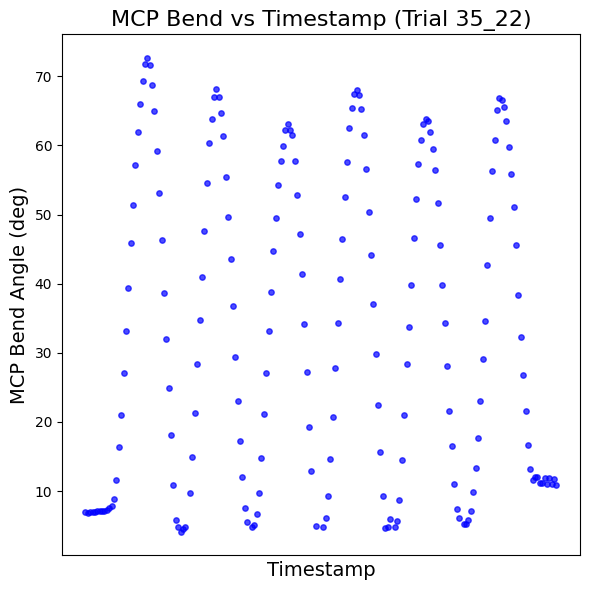

In [628]:
# Plot MCP Bend Angles Calculated from Camera Data vs Camera Timestamp
plt.figure(figsize=(6,6))
plt.scatter(
    cam.df[("ts_25183199", "", "")], 
    cam.df[("metric", "mcp_bend_deg", "deg")],
    s=15, alpha=0.7, color="blue"  # set dots to blue
)

plt.xlabel("Timestamp", fontsize=14)  # bigger label font
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)

plt.title(f"MCP Bend vs Timestamp (Trial {trial_string})", fontsize=16)  # bigger title font

# Remove x ticks completely
plt.xticks([])

plt.tight_layout()
plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs timestamp.png"), dpi=300, bbox_inches='tight')
plt.show()


In [629]:
df_renc.head()

,timestamp,raw,volts,angle
0,183527313626,14302,2.681625,-1.774211
1,183527338571,14291,2.679562,-1.901201
2,183527362585,14324,2.685750,-1.520230
3,183527385173,14316,2.684250,-1.612587
4,183527409564,14326,2.686125,-1.497141


In [630]:
cam.df[("ts_25183199", "", "")]

0      183527321897
1      183527375965
2      183527426484
3      183527476955
4      183527527521
           ...     
194    183537105992
195    183537156365
196    183537206878
197    183537259597
198    183537313547
Name: (ts_25183199, , ), Length: 199, dtype: object

In [631]:
df_renc["timestamp"]

0      183527313626
1      183527338571
2      183527362585
3      183527385173
4      183527409564
           ...     
434    183537206232
435    183537229002
436    183537250422
437    183537274581
438    183537300494
Name: timestamp, Length: 439, dtype: int64

## Align Timestamps 

In [632]:
cam.find_matching_indices(
    encoder_df=df_renc,
    cam_time_col=("ts_25183199", "", ""),  # or "ts_25183199"
    enc_time_col="timestamp",

    #--------------- set a timestamp difference threshold here ------------------
    
    tolerance="1000ms",     # <-- was 10000; use an explicit window for clarity

    #--------------- set a timestamp difference threshold here ------------------
    
    direction="nearest",
)

cam.attach_encoder_using_match(
    encoder_df=df_renc,
    columns=None,
    suffix="_renc",
    keep_time_delta=True,
    drop_unmatched=True,
)


[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 18:35:27.321897 → 0 days 18:35:37.313547
[debug] enc range: 0 days 18:35:27.313626 → 0 days 18:35:37.300494
[debug] probe |delta| (ms) stats: count    23.000000
mean      5.662174
std       3.601032
min       0.839000
25%       2.578500
50%       4.511000
75%       8.542000
max      13.053000
Name: delta_ms, dtype: float64


/Users/phily/Developer/sensorimotor-lab/Strain-Sensor-/Code/analysis/analysis.py:249: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
/Users/phily/Developer/sensorimotor-lab/Strain-Sensor-/Code/analysis/analysis.py:250: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


,"(scorer, bodyparts, coords)","(DLC_3D, PIP, x)","(DLC_3D, PIP, y)","(DLC_3D, PIP, z)","(DLC_3D, MCP, x)","(DLC_3D, MCP, y)","(DLC_3D, MCP, z)","(DLC_3D, hand, x)","(DLC_3D, hand, y)","(DLC_3D, hand, z)",...,"(DLC_3D, forearm, z)","(ts_25183199, , )","(ts_25185174, , )","(metric, mcp_bend_deg, deg)","(metric, wrist_bend_deg, deg)",timestamp_renc,raw_renc,volts_renc,angle_renc,time_delta_renc
0,0,-56.407691,-34.783209,210.792842,-12.783567,-23.532353,222.864746,0.482059,-18.330772,227.252709,...,231.659335,183527321897,183527342244,7.004197,15.968184,183527313626,14302,2.681625,-1.774211,-8.271
1,1,-56.414005,-34.730264,210.841373,-12.787210,-23.480132,222.933579,0.457356,-18.306809,227.252600,...,231.668930,183527375965,183527383641,6.870009,15.736067,183527385173,14316,2.684250,-1.612587,9.208
2,2,-56.407139,-34.749427,210.827146,-12.778167,-23.508914,222.911970,0.463506,-18.317178,227.247799,...,231.683601,183527426484,183527433508,6.966767,15.812072,183527431309,14337,2.688188,-1.370150,4.825
3,3,-56.417401,-34.764705,210.803167,-12.780235,-23.518726,222.895213,0.461807,-18.329779,227.243019,...,231.651525,183527476955,183527483944,6.963025,15.862380,183527474141,14321,2.685188,-1.554864,-2.814
4,4,-56.420838,-34.739852,210.846687,-12.792092,-23.495242,222.939478,0.462131,-18.302194,227.275021,...,231.705221,183527527521,183527536342,6.943030,15.797724,183527519052,14328,2.686500,-1.474051,-8.469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,-57.688983,-33.832180,213.429266,-13.096075,-23.803433,222.832183,0.248847,-18.531406,227.653145,...,231.813644,183537105992,183537113430,11.030921,17.478458,183537115871,13971,2.619562,-5.595472,9.879
195,195,-57.683807,-33.915282,213.295997,-13.097883,-24.013617,222.577163,0.243420,-18.606527,227.549559,...,231.664850,183537156365,183537164034,11.909733,18.153850,183537160442,14002,2.625375,-5.237589,4.077
196,196,-57.696984,-33.824015,213.390979,-13.118057,-23.801716,222.791898,0.231209,-18.520814,227.619776,...,231.662449,183537206878,183537216483,11.062811,17.571902,183537206232,13987,2.622562,-5.410758,-0.646
197,197,-57.688530,-33.864622,213.303260,-13.104145,-23.960993,222.627740,0.232319,-18.537674,227.542694,...,231.631455,183537259597,183537267528,11.798537,17.997886,183537250422,13976,2.620500,-5.537749,-9.175


In [633]:
# Create a smaller dataframe keeping only columns for following:

cols_to_keep = [
    ("ts_25183199", "", ""),  # camera timestamp
    "angle_renc",   
    ("metric", "mcp_bend_deg", "deg"),
    ("metric", "wrist_bend_deg", "deg"),
    "time_delta_renc",  # time difference between camera and rot enc timestamps
]
small_df = cam.df[cols_to_keep].copy()
small_df = small_df.dropna(subset=[("metric", "mcp_bend_deg", "deg")])
small_df = small_df.loc[:, ~small_df.columns.duplicated()].copy()


In [634]:
# Count how many remaining datapoints left  in MCP Bend Angle  after NaN removal from timestamped matched dataframe 

# Count NaNs
remain = len(small_df)

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"Rows after timestamp matching: {total_rows} rows")
print(f"Rows after dropping NaN's in MCP Bend Angle: {remain} rows")

Rows after timestamp matching: 199 rows
Rows after dropping NaN's in MCP Bend Angle: 192 rows


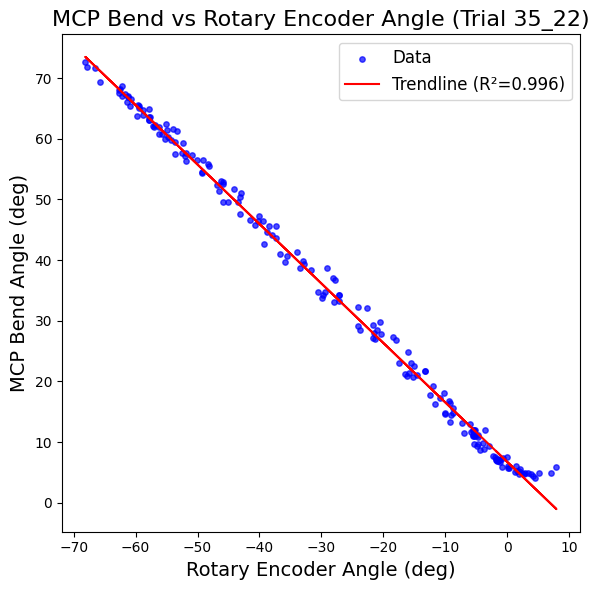

In [635]:
rot_angles = small_df["angle_renc"].to_numpy()
mcp_angles = small_df[("metric", "mcp_bend_deg", "deg")].to_numpy()

# Fit linear regression (y = m*x + b)
m, b = np.polyfit(rot_angles, mcp_angles, 1)
y_pred = m * rot_angles + b

# Compute R²
ss_res = np.sum((mcp_angles - y_pred) ** 2)
ss_tot = np.sum((mcp_angles - np.mean(mcp_angles)) ** 2)        
r2 = 1 - (ss_res / ss_tot)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(rot_angles, mcp_angles, s=15, alpha=0.7, color="blue", label="Data")  # blue dots
plt.plot(rot_angles, y_pred, color="red", label=f"Trendline (R²={r2:.3f})")

plt.xlabel("Rotary Encoder Angle (deg)", fontsize=14)  # bigger labels
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (Trial {trial_string})", fontsize=16)

plt.grid(False)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs rot enc.png"), dpi=300, bbox_inches='tight')
plt.show()

In [636]:
small_df.columns

Index([            ('ts_25183199', '', ''),
                              'angle_renc',
         ('metric', 'mcp_bend_deg', 'deg'),
       ('metric', 'wrist_bend_deg', 'deg'),
                         'time_delta_renc'],
      dtype='object')

In [637]:
small_df[('metric', 'mcp_bend_deg', 'deg')]

0       7.004197
1       6.870009
2       6.966767
3       6.963025
4       6.943030
         ...    
194    11.030921
195    11.909733
196    11.062811
197    11.798537
198    10.914576
Name: (metric, mcp_bend_deg, deg), Length: 192, dtype: float64

# DLC data (MCP) vs Rotenc (Ground Truth)

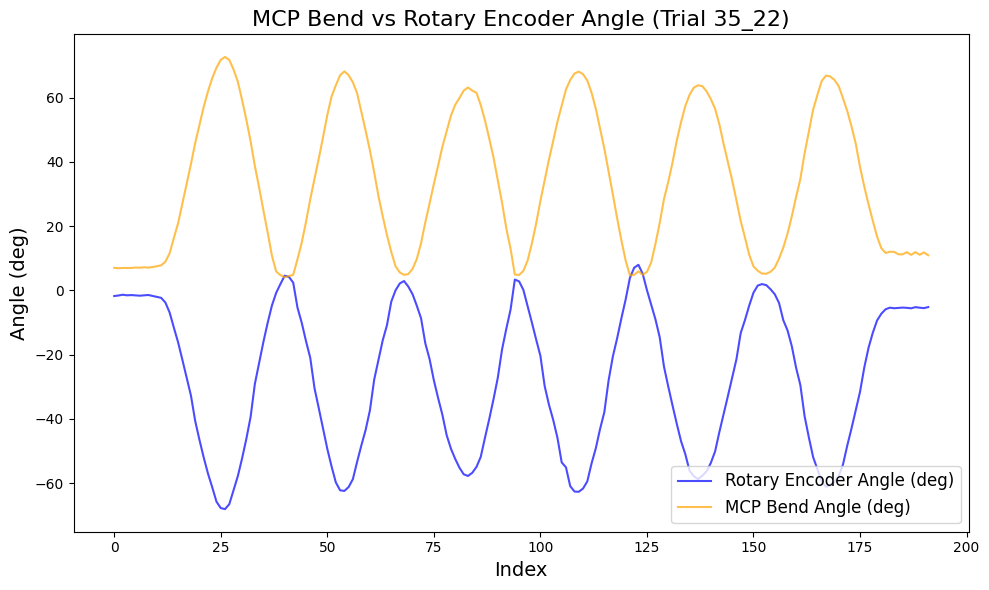

In [638]:
# Plotting DLC vs Rotary Encoder over time/index (RAW)

assert len(rot_angles) == len(mcp_angles)

# --- Plot both angles over index ---
plt.figure(figsize=(10,6))
plt.plot(rot_angles, label="Rotary Encoder Angle (deg)", color="blue", alpha=0.7)
plt.plot(mcp_angles, label="MCP Bend Angle (deg)", color="orange", alpha=0.7)
plt.xlabel("Index", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index.png"), dpi=300, bbox_inches='tight')
plt.show()


In [639]:
# enforce rotary encoder's first time stamp to be zero, and flip sign of all values
rot_angles_tared = - (rot_angles - rot_angles[0])
if signed_angles:
    mcp_angles_tared = - (mcp_angles - mcp_angles[0])
else:
    mcp_angles_tared = mcp_angles - mcp_angles[0]

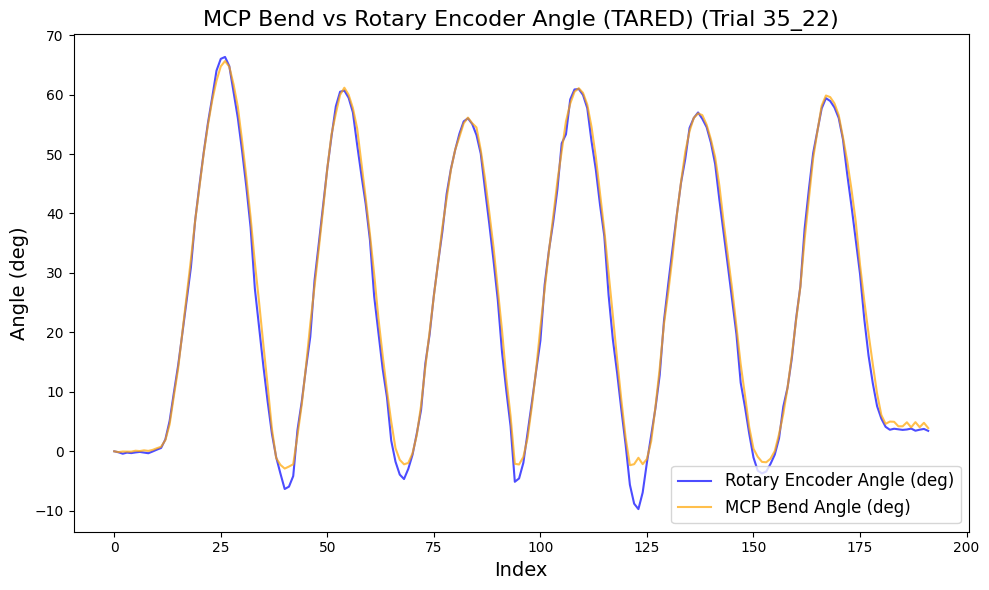

In [640]:
# Plotting DLC vs Rotary Encoder over time/index (RAW)

assert len(rot_angles) == len(mcp_angles)

# --- Plot both angles over index ---
plt.figure(figsize=(10,6))
plt.plot(rot_angles_tared, label="Rotary Encoder Angle (deg)", color="blue", alpha=0.7)
plt.plot(mcp_angles_tared, label="MCP Bend Angle (deg)", color="orange", alpha=0.7)
plt.xlabel("Index", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (TARED) (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index tared.png"), dpi=300, bbox_inches='tight')
plt.show()


In [641]:
# calculate absolute angle error between tared rotary encoder and tared mcp bend angle
angle_error = np.abs(rot_angles_tared - mcp_angles_tared)
mean_error = np.mean(angle_error)
std_error = np.std(angle_error)
print("Absolute Angle Error:")
print("Mean error: ", mean_error)
print("Standard deviation: ", std_error)

Absolute Angle Error:
Mean error:  1.2785729096455336
Standard deviation:  1.2372641359408816


## Calculate Angular Error excluding peaks

In [672]:
# calculate absolute angle error between tared rotary encoder and tared mcp bend angle, BUT only for segments between peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(rot_angles_tared, height=50, distance=5)  # adjust height and distance as needed
valleys, _ = find_peaks(-rot_angles_tared, height=0, distance=10)  # invert signal to find valleys
# valleys = []
peaks, valleys

(array([ 26,  54,  83, 109, 137, 167]), array([  2,  40,  68,  94, 123, 152]))

In [673]:
exclude_range_for_trials = {
    "24_57": 10, # also change peak range to +6 in plt.axvspan(p-exclude_range, p+exclude_range+6, color='grey', alpha=0.5) for the below two cells
    "29_07": 10,
    "31_23": 5,
    "33_22": 2,
    "35_22": 2,
    "37_05": 1
}

exclude_range = exclude_range_for_trials[trial_string]

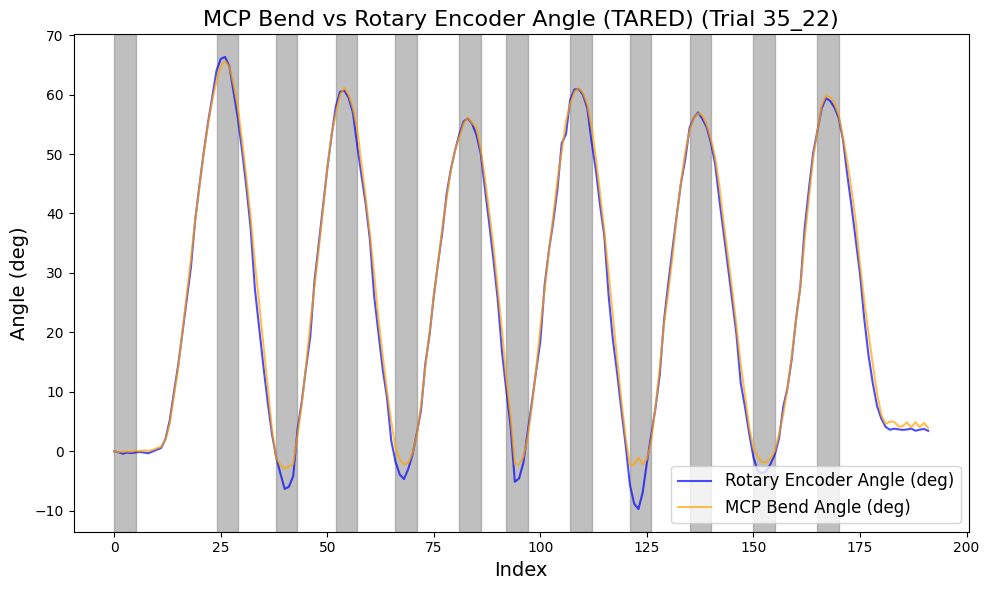

In [674]:
# produce the same graph but shade green between peaks and valleys (also omit 5 indices around peaks/valleys)
plt.figure(figsize=(10,6))
plt.plot(rot_angles_tared, label="Rotary Encoder Angle (deg)", color="blue", alpha=0.7)
plt.plot(mcp_angles_tared, label="MCP Bend Angle (deg)", color="orange", alpha=0.7)
plt.xlabel("Index", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (TARED) (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("MCP Bend vs rot enc over index.png", dpi=300, bbox_inches='tight')

for p in peaks:
    plt.axvspan(p-exclude_range, p+exclude_range+1, color='grey', alpha=0.5)  # omit 5 indices around peak
for v in valleys:
    plt.axvspan(v-exclude_range, v+exclude_range+1, color='grey', alpha=0.5)  # omit 5 indices around valley

plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index tared shaded.png"), dpi=300, bbox_inches='tight')
plt.show()

In [675]:
# Angular error only between peaks and valleys (excluding 5 indices around peaks/valleys)
valid_indices = np.ones(len(rot_angles_tared), dtype=bool)
for p in peaks:
    valid_indices[max(0, p-exclude_range):min(len(rot_angles_tared), p+exclude_range+1)] = False  # exclude 5 indices around peak
for v in valleys:
    valid_indices[max(0, v-exclude_range):min(len(rot_angles_tared), v+exclude_range+1)] = False  # exclude 5 indices around valley
angle_error_peaks_valleys = angle_error[valid_indices]
mean_error_pv = np.mean(angle_error_peaks_valleys)
std_error_pv = np.std(angle_error_peaks_valleys)
print("Absolute Angle Error excluding shaded regions:")
print("Mean error: ", mean_error_pv)
print("Standard deviation: ", std_error_pv)


Absolute Angle Error excluding shaded regions:
Mean error:  1.2600594740026252
Standard deviation:  1.0484761099357847


In [676]:
# indices of tared MCP bend angles that are negative
np.sum(mcp_angles_tared < 0)
np.where(mcp_angles_tared < 0)[0]

array([  1,   2,   3,   4,  38,  39,  40,  41,  42,  67,  68,  69,  70,
        94,  95,  96, 121, 122, 123, 124, 125, 151, 152, 153, 154])

In [677]:
# print values at negative indices
mcp_angles_tared[np.where(mcp_angles_tared < 0)[0]]

array([-0.13418813, -0.03742988, -0.04117244, -0.06116696, -1.12542691,
       -2.28206573, -2.89818195, -2.56706206, -2.17503912, -1.43058214,
       -2.18676911, -1.95229691, -0.33114302, -2.09802146, -2.21531332,
       -0.94675332, -2.33533437, -2.16683672, -1.08767884, -2.16071464,
       -1.27754516, -0.91862172, -1.78243134, -1.84254486, -1.23813574])

In [678]:
# get camera timestamps list
cam.df[("ts_25183199", "", "")]

0      183527321897
1      183527375965
2      183527426484
3      183527476955
4      183527527521
           ...     
194    183537105992
195    183537156365
196    183537206878
197    183537259597
198    183537313547
Name: (ts_25183199, , ), Length: 199, dtype: object

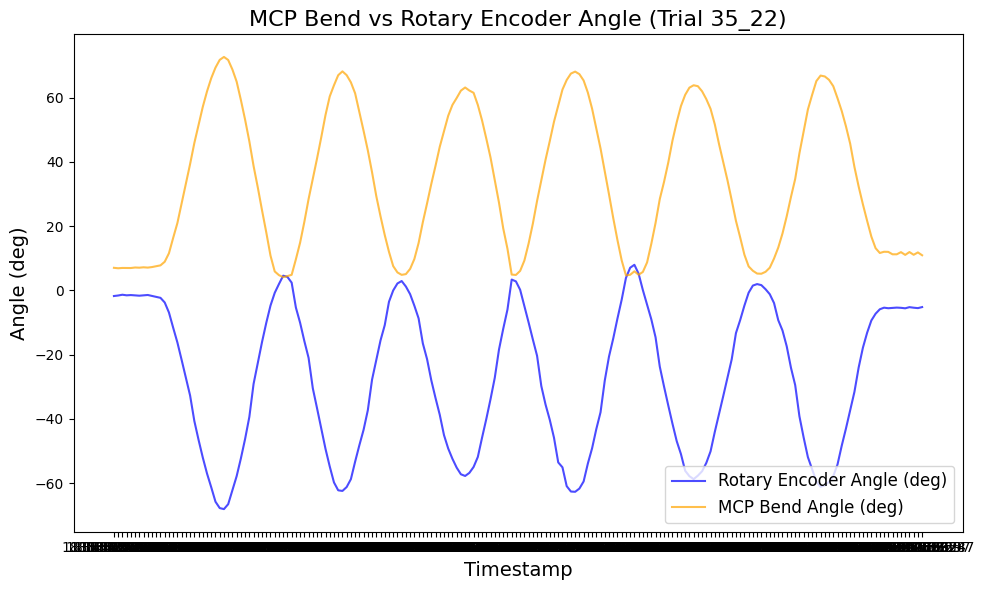

In [679]:
# --- Plot both angles over time (using camera timestamps) ---
plt.figure(figsize=(10,6))
plt.plot(small_df[("ts_25183199", "", "")], rot_angles, label="Rotary Encoder Angle (deg)", color="blue", alpha=0.7)
plt.plot(small_df[("ts_25183199", "", "")], mcp_angles, label="MCP Bend Angle (deg)", color="orange", alpha=0.7)
plt.xlabel("Timestamp", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("MCP Bend vs rot enc over time.png", dpi=300, bbox_inches='tight')
plt.show()

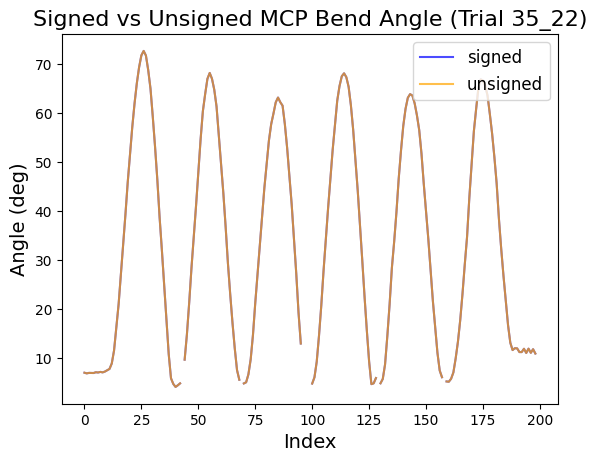

In [680]:
# debugging signed vs unsigned angle calculation accuracy
angles_mcp_signed = - cam.angle_from_vectors(v1_mcp, v2_mcp, signed=True, ref=np.array([0,0,1]))
angles_mcp_unsigned = cam.angle_from_vectors(v1_mcp, v2_mcp)

plt.plot(angles_mcp_signed, label="signed", color="blue", alpha=0.7)
plt.plot(angles_mcp_unsigned, label="unsigned", color="orange", alpha=0.7)
plt.xlabel("Index", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"Signed vs Unsigned MCP Bend Angle (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)

# Save figures and stats

In [681]:
from PIL import Image, ImageDraw, ImageFont

# Load previously saved figures

MCP_time = Image.open(os.path.join(temp_save_dir, "MCP Bend vs timestamp.png"))
MCP_rot = Image.open(os.path.join(temp_save_dir, "MCP Bend vs rot enc.png"))
MCP_rot_index = Image.open(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index.png"))
MCP_rot_index_tared = Image.open(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index tared.png"))
MCP_rot_index_tared_shaded = Image.open(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index tared shaded.png"))

# Decide layout
width = MCP_time.width + MCP_rot.width + MCP_rot_index.width + MCP_rot_index_tared.width + MCP_rot_index_tared_shaded.width
height = max(MCP_time.height, MCP_rot.height, MCP_rot_index.height, MCP_rot_index_tared.height, MCP_rot_index_tared_shaded.height) + 400  # extra space for stats

# Create a blank canvas
summary = Image.new("RGB", (width, height), "white")

# Add stats text
draw = ImageDraw.Draw(summary)
font_size = 120
font = ImageFont.truetype('/Library/Fonts/Arial.ttf', size=font_size)
stats_text = f"Trial {trial_string}:\nAbsolute Angle Error (DLC vs RotEnc): Mean={mean_error}  |  Std={std_error}            Excluding Shaded Region:   Mean={mean_error_pv}  |  Std={std_error_pv}\n"
draw.text((200, 50), stats_text, fill="black", font=font)

# Paste plots
summary.paste(MCP_time, (0, 350))
summary.paste(MCP_rot, (MCP_time.width, 350))
summary.paste(MCP_rot_index, (MCP_time.width + MCP_rot.width, 350))
summary.paste(MCP_rot_index_tared, (MCP_time.width + MCP_rot.width + MCP_rot_index.width, 350))
summary.paste(MCP_rot_index_tared_shaded, (MCP_time.width + MCP_rot.width + MCP_rot_index.width + MCP_rot_index_tared.width, 350))


summary.save(os.path.join(temp_save_dir, f"trial_{trial_string}_summary.png"))
summary.show()
